# <center> Environment Project</center>
#### <center> João Rodrigues 102487  &  Guilherme Casal 102587 </center>
### <center> Analysis of environment data </center>

- _Link for GitHub Project_: https://github.com/GuilhermeCasal/DataManagementFCD 

In this work we will analyze various types of data related to pollution. We will try to obtain some conclusions, try to answer some question. To achieve this, the data will need treatment like nulls filling ,  outliers removal. In order to delevop this results, visualizing and observing the data will be key. 

For this project we are using the libraries _pandas_ for data management,  _seaborn_  and _matplotlib_for data visualization, _geopy_ to calculate distances between different locations and _skitlearn_ for the application of Machine Learning models

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
import seaborn as sns
from geopy.distance import geodesic
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

The data that we used was :  
- _Air Quality_ : It's a data-set from the city of London with the principal componentes of the air, which defines the quality of it. The data consists in  a mean of all days and it's grouped by month. Can be found at:  https://data.london.gov.uk/dataset

- _Pollution_ : This data-set contains the quantity of pollutant gases emited to the air per year. Many countries are included there.  
Can be found at:  https://www.eea.europa.eu/en/datahub/datahubitem-view/9405f714-8015-4b5b-a63c-280b82861b3d  

- _Traffic flow_ : Here we can find the traffic flow from different regions of London per year, distinguished for the  different roads of it.  
Can be found at: https://roadtraffic.dft.gov.uk/regions/6  

- _Health index_ : The last set of data represents the health index. Instead of of having a single index, it contains  one for each area . For exemaple, if one region has a lot of people that do exercise the health index will be postive in that area.  
Can be found at: https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/datasets/healthindexunderlyingdataengland

### The first step is to load and filtrate the data for a area of 50 km of radius around the city of London

In [2]:
#Loading of the data

#air quality file
data_air = pd.read_csv("datasets/air-quality-london-monthly-averages.csv")

#pollution file
data_pol = pd.read_csv("datasets/pollution.csv",low_memory=False)

#traffic flow file
data_traf = pd.read_csv("datasets/dft_aadf_region_id_6.csv")

#health index file
data_health = pd.read_csv("datasets/healthindexunderlyingdataenglandcanscreenfix.csv",delimiter=";")

#### Before the filtering the data, we must visualize it on a table format to see all the variables and how their values are disposed 

The air and traffic flow data-set just includes the London city, thus there's no need to aplly this first filtering

In [3]:
data_air.head()

,Month,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),London Mean Background:Oxides of Nitrogen (ug/m3),London Mean Background:Ozone (ug/m3),London Mean Background:PM10 Particulate (ug/m3),London Mean Background:PM2.5 Particulate (ug/m3),London Mean Background:Sulphur Dioxide (ug/m3)
0,Jan-08,NaN,55.5,NaN,29.5,25.0,14.7,4.2,NaN,42.3,NaN,36.9,18.8,.,3.6
1,Feb-08,NaN,75.9,NaN,20.3,39.5,28.8,7.6,NaN,60.2,NaN,26.4,31.9,.,6.7
2,Mar-08,NaN,55.6,NaN,40.1,21.6,12.3,3.9,NaN,39.8,NaN,50.2,15.5,.,2.3
3,Apr-08,NaN,61.8,NaN,37.9,28.7,20.5,4.5,NaN,44.0,NaN,50.1,21.7,.,3.2
4,May-08,NaN,62.9,NaN,46.3,34.6,27.5,4.6,NaN,44.1,NaN,60.5,29.5,16.6,4.3


In [4]:
data_traf.head()

,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6750,2014,6,London,96,Islington,A201,Major,Swinton St,Pentonville Rd,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,104,Lewisham,A2,Major,A20,A20,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,178,Kingston upon Thames,A240,Major,A3210,A307,...,175,1589,251,35,13,2,4,19,325,12951
3,27765,2014,6,London,57,Barnet,A5109,Major,Barnet Lane,A1000/A109,...,302,1651,246,12,12,0,1,1,273,19276
4,8488,2014,6,London,104,Lewisham,A20,Major,A20 Amersham Rd,A2 Parkfield Rd,...,656,1617,286,83,27,5,8,7,415,12821


In [5]:
data_pol.head()

,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,facilityNameConfidentialityReason,Longitude,Latitude,addressConfidentialityReason,City,targetRelease,pollutant,emissions,reportingYear,releasesConfidentialityReason
0,Austria,4.0,Chemical industry,4(d),Chemical installations for the production on a...,AT.CAED/9008390392737.FACILITY,Nufarm GmbH & CO KG,NaN,14.336056,48.290943,NaN,Linz,AIR,"1,2-dichloroethane (DCE-1,2)",3300.0,2007,NaN
1,Austria,9.0,Other activities,9(c),Installations for the surface treatment of sub...,AT.CAED/9008390396414.FACILITY,MAGNA STEYR Fahrzeugtechnik AG&Co KG,NaN,15.477778,47.019170,NaN,"Graz,07.Bez.:Liebenau",AIR,Non-methane volatile organic compounds (NMVOC),170000.0,2007,NaN
2,Austria,6.0,Paper and wood production and processing,6(b),Industrial plants for the production of paper ...,AT.CAED/9008390397176.FACILITY,Fritz EGGER GmbH & Co. OG,NaN,15.691833,48.259556,NaN,Unterradlberg,AIR,Carbon dioxide (CO2),228000000.0,2007,NaN
3,Austria,6.0,Paper and wood production and processing,6(b),Industrial plants for the production of paper ...,AT.CAED/9008390397176.FACILITY,Fritz EGGER GmbH & Co. OG,NaN,15.691833,48.259556,NaN,Unterradlberg,AIR,Nitrogen oxides (NOX),311000.0,2007,NaN
4,Austria,3.0,Mineral industry,3(c),Installations for the production of cement cli...,AT.CAED/9008390397220.FACILITY,voestalpine Stahl GmbH,NaN,14.159778,47.807083,NaN,Klaus an der Pyhrnbahn,AIR,Carbon dioxide (CO2),329000000.0,2007,NaN


### Filtering cities

For the datasets that contain several cities in the United Kingdom, we created a function to find out all the cities contained in the dataset in question within a radius of 50 kilometers based on latitude and longitude.
This is because we think it is important to bring together cities closer together as they will certainly be the most impactful in terms of pollution.

In [6]:
def citiesWithinRadius(cities,radius,data_cities,data_from_outside=True):
    lat_lon_london = (51.509865, -0.118092)
    cidades = []
    #iterate all cities around london
    for city in cities:
        cidade = city
        #check if the data countains coordinates information or not and take the row with city iterated
        if data_from_outside:
            city = data_cities[data_cities["city"]== city]
        else:
            city = data_cities[data_cities["City"]== city]

        try:
            #take the corrdinates
            if data_from_outside:
                loc = (pd.array(city["lat"])[0],pd.array(city["lng"])[0])
            else:
                loc = (pd.array(city["Latitude"])[0],pd.array(city["Longitude"])[0])
        except:
            continue
        #if the distance is lower than 50, append to the list
        distance = geodesic(lat_lon_london, loc).kilometers
        if distance<=50:
            cidades.append(cidade)
    return cidades

Filtering of pollution data-set

In [7]:
#just Uk country
data_cities = data_pol[data_pol["countryName"]=="United Kingdom"]
#return all cities within a radius of 50 km from London
city_50km = citiesWithinRadius(data_health["Area name"].unique(), 50, data_cities,False)
#select the cities around london
data_pol = data_pol[data_pol["City"].isin(city_50km)]
data_pol.head()


,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,facilityNameConfidentialityReason,Longitude,Latitude,addressConfidentialityReason,City,targetRelease,pollutant,emissions,reportingYear,releasesConfidentialityReason
289510,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Chlorofluorocarbons (CFCs),11.10,2007,NaN
289511,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Hydrochlorofluorocarbons (HCFCs),4.88,2007,NaN
289512,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Methane (CH4),117000.00,2007,NaN
289806,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",GB.EEA/31898.FACILITY,O-I Manufacturing UK,NaN,0.110430,51.783016,NaN,Harlow,AIR,Arsenic and compounds (as As),35.00,2007,NaN
289807,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",GB.EEA/31898.FACILITY,O-I Manufacturing UK,NaN,0.110430,51.783016,NaN,Harlow,AIR,Nitrogen oxides (NOX),446000.00,2007,NaN


The health data-set doesn't include coordinates, so we have a complementary data-set that contains the coordinates of many cities around the world

In [8]:
data_health.head()


,Area code,Area name,Value,Numerator,Denominator,Indicator name,Year
0,E06000001,Hartlepool,"62,68947549",NaN,NaN,Physical activity,2015
1,E06000002,Middlesbrough,"62,8371136",NaN,NaN,Physical activity,2015
2,E06000003,Redcar and Cleveland,"65,80605787",NaN,NaN,Physical activity,2015
3,E06000004,Stockton-on-Tees,"59,83048525",NaN,NaN,Physical activity,2015
4,E06000005,Darlington,"65,39884288",NaN,NaN,Physical activity,2015


The data-set of the cities with their locations was found in : https://simplemaps.com/data/world-cities

Filtering of health index data-set

In [9]:
#information of the cities coordinates
data_cities = pd.read_csv("datasets/worldcities.csv")
data_cities = data_cities[data_cities["country"]=="United Kingdom"]
city_50km = citiesWithinRadius(data_health["Area name"].unique(), 50, data_cities)
data_health = data_health[data_health["Area name"].isin(city_50km)]
data_health.head()

,Area code,Area name,Value,Numerator,Denominator,Indicator name,Year
29,E06000032,Luton,"61,75566862",NaN,NaN,Physical activity,2015
36,E06000039,Slough,"59,60549999",NaN,NaN,Physical activity,2015
90,E07000066,Basildon,"65,4596393",NaN,NaN,Physical activity,2015
92,E07000068,Brentwood,"68,62717127",NaN,NaN,Physical activity,2015
94,E07000070,Chelmsford,"67,26048083",NaN,NaN,Physical activity,2015


### Not every variable is relevant to the analysis,thus some of them will be excluded  
Also, there will be a modification in the name of the columns, to simpler ones and a re-indexing, where the dates will be the "primary key", so, in the future, we are allowed to merge with other data-sets

Air quality is determined by the presence and concentration of various air pollutant, from those who influence air quality the most, three will be selected to the analysis.  
The components chosen have in consideration studies made in paper "Megacities and Atmospheric Pollution" from Mario J. Molina and Luisa T. Molina


In [10]:
data_air.head()

,Month,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),London Mean Background:Oxides of Nitrogen (ug/m3),London Mean Background:Ozone (ug/m3),London Mean Background:PM10 Particulate (ug/m3),London Mean Background:PM2.5 Particulate (ug/m3),London Mean Background:Sulphur Dioxide (ug/m3)
0,Jan-08,NaN,55.5,NaN,29.5,25.0,14.7,4.2,NaN,42.3,NaN,36.9,18.8,.,3.6
1,Feb-08,NaN,75.9,NaN,20.3,39.5,28.8,7.6,NaN,60.2,NaN,26.4,31.9,.,6.7
2,Mar-08,NaN,55.6,NaN,40.1,21.6,12.3,3.9,NaN,39.8,NaN,50.2,15.5,.,2.3
3,Apr-08,NaN,61.8,NaN,37.9,28.7,20.5,4.5,NaN,44.0,NaN,50.1,21.7,.,3.2
4,May-08,NaN,62.9,NaN,46.3,34.6,27.5,4.6,NaN,44.1,NaN,60.5,29.5,16.6,4.3


In [11]:
data_air.drop(["London Mean Roadside:Nitric Oxide (ug/m3)","London Mean Background:Nitric Oxide (ug/m3)",
               "London Mean Roadside:Oxides of Nitrogen (ug/m3)", "London Mean Background:Oxides of Nitrogen (ug/m3)"
               ],axis=1,inplace=True)
data_air.rename(columns={"London Mean Roadside:Nitrogen Dioxide (ug/m3)":"NO2 Air",
                         "London Mean Roadside:PM10 Particulate (ug/m3)":"PM10 Air",
                        "London Mean Roadside:PM2.5 Particulate (ug/m3)":"PM25",
                        "London Mean Roadside:Sulphur Dioxide (ug/m3)":"SO2 Air",
                        "London Mean Roadside:Ozone (ug/m3)" : "O3",
                        "London Mean Background:Nitrogen Dioxide (ug/m3)":"bg NO2",
                         "London Mean Background:PM10 Particulate (ug/m3)":"bg PM10",
                        "London Mean Background:PM2.5 Particulate (ug/m3)":"bg PM25",
                        "London Mean Background:Sulphur Dioxide (ug/m3)":"bg SO2",
                        "London Mean Background:Ozone (ug/m3)" : "bg O3",
                         },inplace=True)

data_air = data_air.loc[:,["Month","NO2 Air","PM10 Air","SO2 Air"]]

data_air.head()


,Month,NO2 Air,PM10 Air,SO2 Air
0,Jan-08,55.5,25.0,4.2
1,Feb-08,75.9,39.5,7.6
2,Mar-08,55.6,21.6,3.9
3,Apr-08,61.8,28.7,4.5
4,May-08,62.9,34.6,4.6


In pollution data-set, the only relevant variables will be pollutant,the number of emissions, date, the city and the sector the emited the pollutant.  
In order to observe the evolution of each pulltant for each year, they will be tranformed to collums with pivot method


In [12]:
data_pol.head()

,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,facilityNameConfidentialityReason,Longitude,Latitude,addressConfidentialityReason,City,targetRelease,pollutant,emissions,reportingYear,releasesConfidentialityReason
289510,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Chlorofluorocarbons (CFCs),11.10,2007,NaN
289511,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Hydrochlorofluorocarbons (HCFCs),4.88,2007,NaN
289512,United Kingdom,5.0,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,GB.EEA/13495.FACILITY,"Viridor Waste Management Ltd, Beddington Farml...",NaN,-0.142952,51.389667,NaN,Sutton,AIR,Methane (CH4),117000.00,2007,NaN
289806,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",GB.EEA/31898.FACILITY,O-I Manufacturing UK,NaN,0.110430,51.783016,NaN,Harlow,AIR,Arsenic and compounds (as As),35.00,2007,NaN
289807,United Kingdom,3.0,Mineral industry,3(e),"Installations for the manufacture of glass, in...",GB.EEA/31898.FACILITY,O-I Manufacturing UK,NaN,0.110430,51.783016,NaN,Harlow,AIR,Nitrogen oxides (NOX),446000.00,2007,NaN


In [13]:
data_pol = data_pol[["pollutant","emissions","reportingYear"]]
data_pol.rename(columns={"reportingYear":"Year"},inplace=True)
data_pol = data_pol.groupby(["Year","pollutant"])["emissions"].mean().reset_index().rename(columns={"emissions":"emissions"})
data_pol = data_pol.pivot(index='Year', columns='pollutant', values='emissions')
data_pol.head()

pollutant,Ammonia (NH3),Arsenic and compounds (as As),Carbon dioxide (CO2),Carbon dioxide (CO2) excluding biomass,Chlordecone,Chlorine and inorganic compounds (as HCl),Chlorofluorocarbons (CFCs),Chromium and compounds (as Cr),Halons,Hydro-fluorocarbons (HFCS),Hydrochlorofluorocarbons (HCFCs),Lead and compounds (as Pb),Methane (CH4),Nitrogen oxides (NOX),Nitrous oxide (N2O),Non-methane volatile organic compounds (NMVOC),Polycyclic aromatic hydrocarbons (PAHs),Sulphur oxides (SOX),Trichloromethane
Year,,,,,,,,,,,,,,,,,,,
2007,NaN,35.0,1.960000e+09,NaN,NaN,NaN,11.1,NaN,NaN,NaN,4.88,NaN,130000.0,670500.0,NaN,NaN,NaN,247000.0,NaN
2008,NaN,28.0,2.120000e+09,NaN,NaN,NaN,11.8,NaN,NaN,NaN,6.34,NaN,173500.0,791500.0,NaN,NaN,NaN,265000.0,NaN
2009,51400.0,NaN,2.050000e+09,NaN,NaN,NaN,24.7,NaN,2.36,NaN,14.40,NaN,262500.0,823000.0,NaN,750000.0,NaN,373000.0,NaN
2010,35200.0,NaN,1.030000e+09,NaN,NaN,NaN,13.5,NaN,NaN,NaN,5.20,218.0,159000.0,496500.0,NaN,NaN,6490.0,168000.0,NaN
2011,32700.0,37.7,1.960000e+09,NaN,4.23,11300.0,208.0,NaN,NaN,NaN,53.30,NaN,1184000.0,1007500.0,NaN,NaN,NaN,245000.0,NaN


We chose only a few pollutants because we had a lot of NaN values, that is, we chose based on the main pollutants that had the most impact on health and those that had the most values
Even so, we had some Nan Values and we decided to use a scatter matrix to see if we had some pollutants with similar values so that we could create a linear regression to fill in the values, but we still realized that it was not possible.

' '

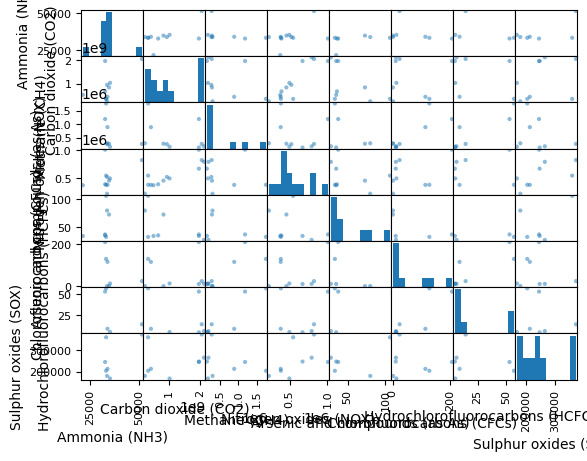

In [14]:
data_pol = data_pol.loc[:, ["Ammonia (NH3)", "Carbon dioxide (CO2)",
                             "Methane (CH4)", "Nitrogen oxides (NOX)", "Arsenic and compounds (as As)", "Chlorofluorocarbons (CFCs)", "Hydrochlorofluorocarbons (HCFCs)", "Sulphur oxides (SOX)"]]
scatter_matrix(data_pol)
" "

Then we filter by the most relevant components emited to the atmosphere, according to the paper referenced before,  and fill them with the K-Nearest Neighbors

In [15]:
data_pol = data_pol.loc[:, ["Ammonia (NH3)", "Sulphur oxides (SOX)",
                            "Methane (CH4)", "Nitrogen oxides (NOX)"]]

data_pol

pollutant,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,
2007,NaN,247000.0,130000.0,6.705000e+05
2008,NaN,265000.0,173500.0,7.915000e+05
2009,51400.0,373000.0,262500.0,8.230000e+05
2010,35200.0,168000.0,159000.0,4.965000e+05
2011,32700.0,245000.0,1184000.0,1.007500e+06
2012,33900.0,213000.0,884000.0,3.820000e+05
2013,33200.0,204000.0,1760000.0,3.836667e+05
2014,33200.0,360000.0,NaN,5.466667e+05
2015,33700.0,180000.0,286000.0,2.250000e+05


The K-Nearest Neighbors (KNN) imputation works by finding the K nearest data points to the sample with missing values and imputing the missing values based on these nearby points. 

In [16]:
# Reset the index of merged_df
def knn(data):
    index = data.index
    data.reset_index(drop=True, inplace=True)
    imputer = KNNImputer(n_neighbors=2)

    # Fill missing values using KNN
    merged_df = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

    merged_df = merged_df.set_index(index)
    return merged_df


data_pol = knn(data_pol)
data_pol


pollutant,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,
2007,34200.0,247000.0,130000.0,6.705000e+05
2008,43300.0,265000.0,173500.0,7.915000e+05
2009,51400.0,373000.0,262500.0,8.230000e+05
2010,35200.0,168000.0,159000.0,4.965000e+05
2011,32700.0,245000.0,1184000.0,1.007500e+06
2012,33900.0,213000.0,884000.0,3.820000e+05
2013,33200.0,204000.0,1760000.0,3.836667e+05
2014,33200.0,360000.0,262000.0,5.466667e+05
2015,33700.0,180000.0,286000.0,2.250000e+05


For this analysis we won't consider the flow in the different roads, thus the only variable related to that,  will be "all_motor_vehicles" which includes the sum of all road flows

In [17]:
data_traf.head()

,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6750,2014,6,London,96,Islington,A201,Major,Swinton St,Pentonville Rd,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,104,Lewisham,A2,Major,A20,A20,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,178,Kingston upon Thames,A240,Major,A3210,A307,...,175,1589,251,35,13,2,4,19,325,12951
3,27765,2014,6,London,57,Barnet,A5109,Major,Barnet Lane,A1000/A109,...,302,1651,246,12,12,0,1,1,273,19276
4,8488,2014,6,London,104,Lewisham,A20,Major,A20 Amersham Rd,A2 Parkfield Rd,...,656,1617,286,83,27,5,8,7,415,12821


There will be only one value for each year, that corresponds to the sum of all regions of London selected previously

In [18]:
data_traf = data_traf[["year","local_authority_name","all_motor_vehicles"]]
data_traf = data_traf.groupby('year')['all_motor_vehicles'].sum().reset_index()

data_traf =data_traf.set_index(["year"])
data_traf.head()

,all_motor_vehicles
year,
2000,55572506
2001,55553417
2002,54356983
2003,55230556
2004,54561589


From the health index data-set will only be withdrawn, related to health, the value and the Indicator name(area which the index is being applied), since the numerator and denominator are only used to obtain the variable "value".

In [19]:
data_health["Indicator name"].unique()

array(['Physical activity', 'Air pollution', 'Alcohol misuse',
       'Mortality from all causes', 'Avoidable mortality',
       'Cancer screening attendance', 'Cancer', 'Child poverty',
       'Drug misuse', 'Low-level crime', 'Personal crime',
       'Cardiovascular conditions', 'Dementia', 'Diabetes', 'Disability',
       'Distance to GP services', 'Distance to pharmacies',
       'Distance to sports or leisure facilities', 'Healthy eating',
       'Noise complaints', 'Early years development', 'Frailty',
       'Patients offered acceptable GP practice appointments',
       'High blood pressure', 'Household overcrowding',
       'Young people in education, employment and apprenticeships',
       'Sedentary behaviour', 'Infant mortality', 'Internet access',
       'Kidney and liver disease', 'Pupil attainment', 'Life expectancy',
       'Low birth weight', 'Mental health conditions',
       'Musculoskeletal conditions', 'Overweight and obesity in adults',
       'Overweight and obesi

Just a few health factors will be selected. They are the ones we think have more correlation to pollution. They will also be now collumns of the data-set, so that we can have a row for each year
  

In [20]:
data_health = data_health[["Area name","Value","Indicator name","Year"]].copy()
data_health['Value'] = data_health['Value'].str.replace(',', '.')
data_health["Value"] = data_health["Value"].astype(float)
data_health = data_health.groupby(["Year", "Indicator name"])["Value"].mean().reset_index().rename(columns={"Value":"Value"})
data_health = data_health.pivot(index='Year', columns='Indicator name', values='Value')
data_health= data_health.loc[:,["Air pollution", "Cancer", "Respiratory conditions"]]
data_health


Indicator name,Air pollution,Cancer,Respiratory conditions
Year,,,
2015,10.435721,3.222155,10.976621
2016,11.451568,3.222155,10.976621
2017,11.480882,3.222155,10.976621
2018,11.457786,3.222155,10.976621
2019,11.196704,3.412539,11.165615
2020,8.854768,3.384097,11.290680
2021,8.221743,3.088371,11.663465


We had values for all months of each year we decided to make an average per year.

In [21]:
data_air["Month"] = pd.to_datetime(data_air["Month"], format='%b-%y').dt.year
data_air.rename(columns={"Month":"Year"}, inplace=True)
data_air = data_air.set_index("Year")
data_air = data_air.groupby("Year").mean()
data_air.head()


,NO2 Air,PM10 Air,SO2 Air
Year,,,
2008,57.016667,26.391667,4.066667
2009,58.333333,25.808333,3.491667
2010,58.633333,25.433333,3.933333
2011,55.866667,27.641667,2.883333
2012,60.069231,26.669231,3.000000


In the code below we verify NaN values for all datasets

In [22]:
health_NaN = data_health.isna().any()
health_NaN

Indicator name
Air pollution             False
Cancer                    False
Respiratory conditions    False
dtype: bool

In [23]:
air_NaN = data_air.isna().any()
air_NaN

NO2 Air     False
PM10 Air    False
SO2 Air     False
dtype: bool

In [24]:
pol_NaN = data_pol.isna().any()
pol_NaN

pollutant
Ammonia (NH3)            False
Sulphur oxides (SOX)     False
Methane (CH4)            False
Nitrogen oxides (NOX)    False
dtype: bool

In [25]:
traf_NaN = data_traf.isna().any()
traf_NaN

all_motor_vehicles    False
dtype: bool

### Plot some data


The points that the boxplot mark as outliers, dont seem like noisy data. Those points are just a slight deviation from the usual pattern, which is normal for envrionmental data, because this one is having some drastic changes in the last years ,so they will not be removed.


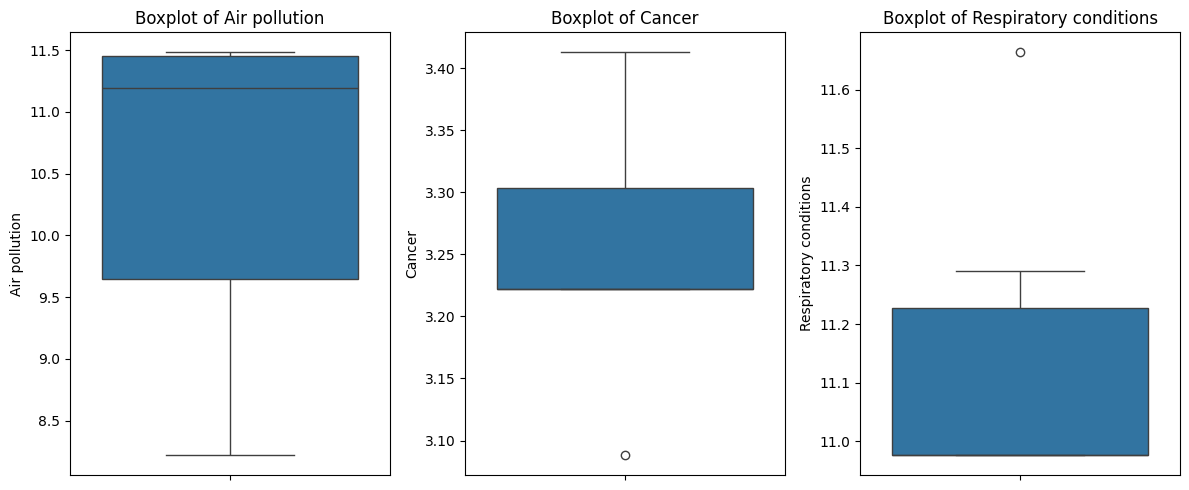

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, col in enumerate(data_health.columns):
    sns.boxplot(y=data_health[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

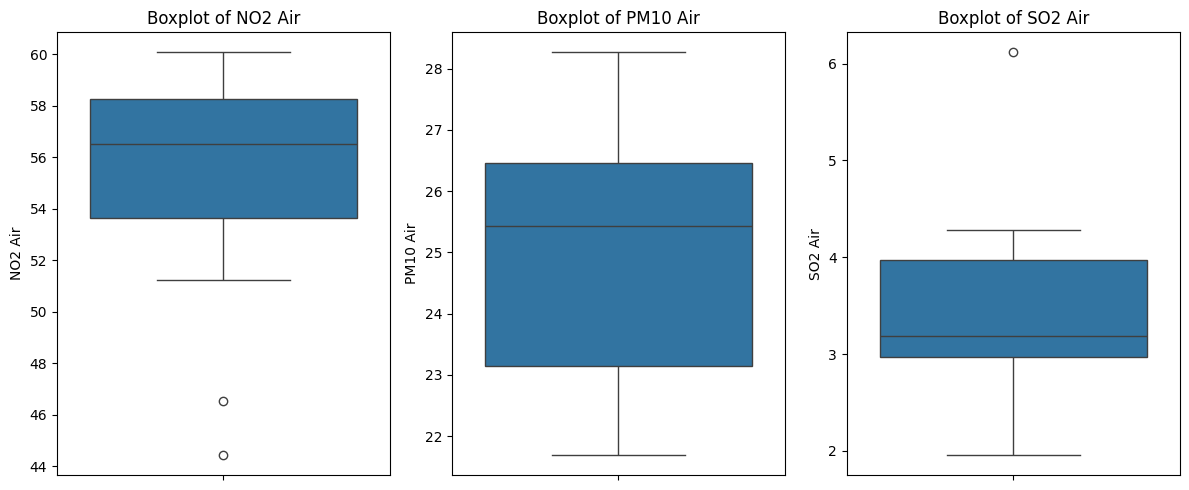

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, col in enumerate(data_air.columns):
    sns.boxplot(y=data_air[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

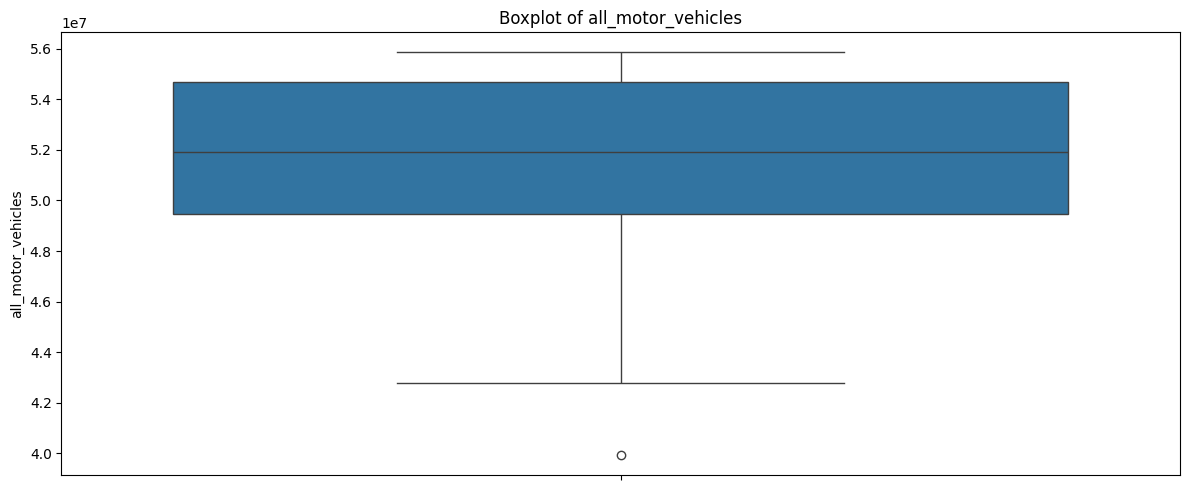

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
for i, col in enumerate(data_traf.columns):
    sns.boxplot(y=data_traf[col], ax=axes)
    axes.set_title(f'Boxplot of {col}')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

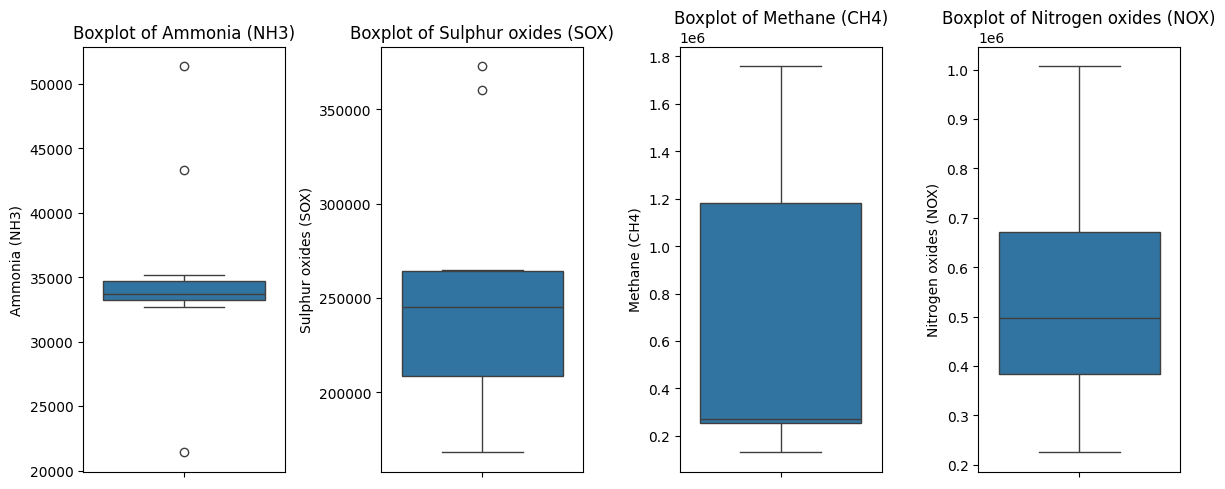

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5))
for i, col in enumerate(data_pol.columns):
    sns.boxplot(y=data_pol[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

### Merge Datasets 

Now all data will be merged, so that it can be analysed more easily in the future

In [30]:
merged_df = data_traf.join(data_air,how="outer")
merged_df = merged_df.join(data_health,how="outer")
merged_df = merged_df.join(data_pol,how="outer")
merged_df.head(20)

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
2000,55572506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,55553417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,54356983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,55230556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,54561589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,54435671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,55846934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,54834530,NaN,NaN,NaN,NaN,NaN,NaN,34200.0,247000.0,130000.0,6.705000e+05
2008,55040271,57.016667,26.391667,4.066667,NaN,NaN,NaN,43300.0,265000.0,173500.0,7.915000e+05
2009,54216130,58.333333,25.808333,3.491667,NaN,NaN,NaN,51400.0,373000.0,262500.0,8.230000e+05


The health index just have data since year 2015 until 2021, thus we will have two distinct  merged data-sets, in order to avoid large number of NaN values.

- The first one includes all data-sets since 2015 until 2021, also we will complete the Nan values with KNN

In [31]:
merged_2015 = merged_df.loc[2015:2021,:]
merged_2015 


,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
2015,49450382,54.466667,23.725000,2.891667,10.435721,3.222155,10.976621,33700.0,180000.0,286000.0,225000.0
2016,49472094,56.375000,23.208333,4.283333,11.451568,3.222155,10.976621,34700.0,264000.0,270000.0,457000.0
2017,49833281,51.233333,21.691667,3.191667,11.480882,3.222155,10.976621,33700.0,264000.0,254000.0,523000.0
2018,51555695,46.550000,22.208333,1.958333,11.457786,3.222155,10.976621,32700.0,208500.0,1322000.0,392000.0
2019,52646698,44.442857,22.942857,6.114286,11.196704,3.412539,11.165615,21400.0,208500.0,1322000.0,375500.0
2020,39938321,NaN,NaN,NaN,8.854768,3.384097,11.290680,NaN,NaN,NaN,NaN
2021,42798523,NaN,NaN,NaN,8.221743,3.088371,11.663465,NaN,NaN,NaN,NaN


In [32]:
merged_2015 = knn(merged_2015)
merged_2015

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
2015,49450382.0,54.466667,23.725000,2.891667,10.435721,3.222155,10.976621,33700.0,180000.0,286000.0,225000.0
2016,49472094.0,56.375000,23.208333,4.283333,11.451568,3.222155,10.976621,34700.0,264000.0,270000.0,457000.0
2017,49833281.0,51.233333,21.691667,3.191667,11.480882,3.222155,10.976621,33700.0,264000.0,254000.0,523000.0
2018,51555695.0,46.550000,22.208333,1.958333,11.457786,3.222155,10.976621,32700.0,208500.0,1322000.0,392000.0
2019,52646698.0,44.442857,22.942857,6.114286,11.196704,3.412539,11.165615,21400.0,208500.0,1322000.0,375500.0
2020,39938321.0,55.420833,23.466667,3.587500,8.854768,3.384097,11.290680,34200.0,222000.0,278000.0,341000.0
2021,42798523.0,55.420833,23.466667,3.587500,8.221743,3.088371,11.663465,34200.0,222000.0,278000.0,341000.0


- The second one includes all data-sets except health index, also we will only merged data since 2007 until 2021, because traffic flow is the only one dataset that has data from 2007 backwards. The Nan values will be filled here, aswell.

In [33]:
merged_no_health  = merged_df.drop(["Air pollution","Cancer","Respiratory conditions"],axis=1).loc[2007:2021,:]
merged_no_health


,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
2007,54834530,NaN,NaN,NaN,34200.0,247000.0,130000.0,6.705000e+05
2008,55040271,57.016667,26.391667,4.066667,43300.0,265000.0,173500.0,7.915000e+05
2009,54216130,58.333333,25.808333,3.491667,51400.0,373000.0,262500.0,8.230000e+05
2010,51921676,58.633333,25.433333,3.933333,35200.0,168000.0,159000.0,4.965000e+05
2011,50247234,55.866667,27.641667,2.883333,32700.0,245000.0,1184000.0,1.007500e+06
2012,48965709,60.069231,26.669231,3.000000,33900.0,213000.0,884000.0,3.820000e+05
2013,49059691,58.218182,28.263636,3.190909,33200.0,204000.0,1760000.0,3.836667e+05
2014,49510592,56.675000,25.425000,3.058333,33200.0,360000.0,262000.0,5.466667e+05
2015,49450382,54.466667,23.725000,2.891667,33700.0,180000.0,286000.0,2.250000e+05
2016,49472094,56.375000,23.208333,4.283333,34700.0,264000.0,270000.0,4.570000e+05


In [34]:
merged_no_health = knn(merged_no_health)
merged_no_health

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
2007,54834530.0,57.675000,26.100000,3.779167,34200.0,247000.0,130000.0,6.705000e+05
2008,55040271.0,57.016667,26.391667,4.066667,43300.0,265000.0,173500.0,7.915000e+05
2009,54216130.0,58.333333,25.808333,3.491667,51400.0,373000.0,262500.0,8.230000e+05
2010,51921676.0,58.633333,25.433333,3.933333,35200.0,168000.0,159000.0,4.965000e+05
2011,50247234.0,55.866667,27.641667,2.883333,32700.0,245000.0,1184000.0,1.007500e+06
2012,48965709.0,60.069231,26.669231,3.000000,33900.0,213000.0,884000.0,3.820000e+05
2013,49059691.0,58.218182,28.263636,3.190909,33200.0,204000.0,1760000.0,3.836667e+05
2014,49510592.0,56.675000,25.425000,3.058333,33200.0,360000.0,262000.0,5.466667e+05
2015,49450382.0,54.466667,23.725000,2.891667,33700.0,180000.0,286000.0,2.250000e+05
2016,49472094.0,56.375000,23.208333,4.283333,34700.0,264000.0,270000.0,4.570000e+05
